Jupyter-notebook for laboratory work (Franck-Hertz experiment)

Used tools:

python          

pandas          

openpyxl        

matplotlib     


Physical terms that are used in this project.

"I" is an anodic amperage.

"U1" is a voltage on the metal grid.

"U2" is a voltage on the anode.

"U3" is a voltage on the cathode.

Given: 9 datasets in .xlsx format filled with (x,y)-pairs on the sheet "Plot".

Imports and user data types definitions.

In [1]:
import pandas as pd
import numpy as np
from typing import List, Dict
from matplotlib import pyplot as plt

Dataset = List[List[float]]

The definition of function that gets data from .xlsx files in /datasets folder from 1.xlsx to numOfExps inclusively and returns list of Dataset objects.

In [2]:
def getData(numOfExps: int) -> List[Dataset]:
    dfs = []
    for i in range(numOfExps):
        file = "datasets/" + str(i + 1) + ".xlsx"
        xl = pd.ExcelFile(file)
        xl = xl.parse("Plot")
        dfs.append(xl.values.tolist())
    return dfs

This function draws three plots on one image

In [3]:
def drawPlots(
    ds1: Dataset, ds2: Dataset, ds3: Dataset,
    lb1: str, lb2: str, lb3: str, title: str
):
    sizes = [len(ds1), len(ds2), len(ds3)]
    
    plt.plot(
        [ds1[i][0] for i in range(sizes[0])], 
        [ds1[i][1] for i in range(sizes[0])], 
        "b-", label=lb1
    )
    plt.plot(
        [ds2[i][0] for i in range(sizes[1])], 
        [ds2[i][1] for i in range(sizes[1])], 
        "g-", label=lb2
    )
    plt.plot(
        [ds3[i][0] for i in range(sizes[2])], 
        [ds3[i][1] for i in range(sizes[2])], 
        "r-", label=lb3
    )
    plt.legend(loc = 9)
    plt.xlabel("U, V")
    plt.ylabel("I, nA")
    plt.title(title)
    plt.show()

Now we need to recieve and structure the data 

In [4]:
dfs = getData(9)

plotsData = [
    {
        'dfs': [dfs[0], dfs[1], dfs[2]],
        'lbs': ['U2 = 7V', 'U2 = 8V', 'U2 = 9V'],
        'title': 'U1 = 6V; U3 = 3V'

    },
    {
        'dfs': [dfs[3], dfs[4], dfs[5]],
        'lbs': ['U2 = 7V', 'U2 = 8V', 'U2 = 9V'],
        'title': 'U1 = 6V; U3 = 4V'
    },
    {
        'dfs': [dfs[1], dfs[4], dfs[7]],
        'lbs': ['U3 = 3V', 'U3 = 4V', 'U3 = 5V'],
        'title': 'U1 = 6V; U2 = 8V'
    },
    {
        'dfs': [dfs[2], dfs[5], dfs[8]],
        'lbs': ['U3 = 3V', 'U3 = 4V', 'U3 = 5V'],
        'title': 'Ul = 6V; U2 = 9V'
    }
]

And, finally, we draw the plots. It is easy to see that if the parameter "U3" increases, the parameter "I" will increase as well. And conversely, if the parameter "U2" increases, then the parameter "I" will decrease.

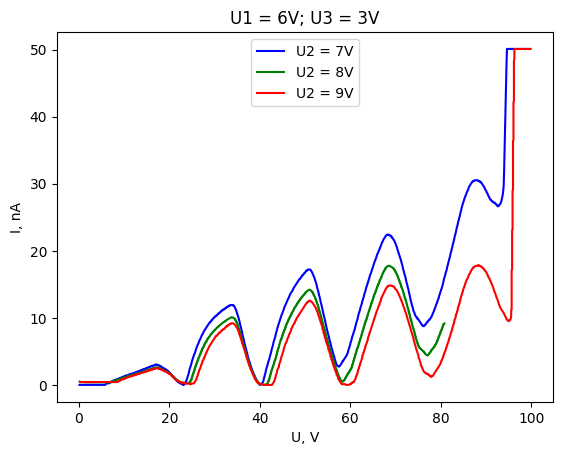

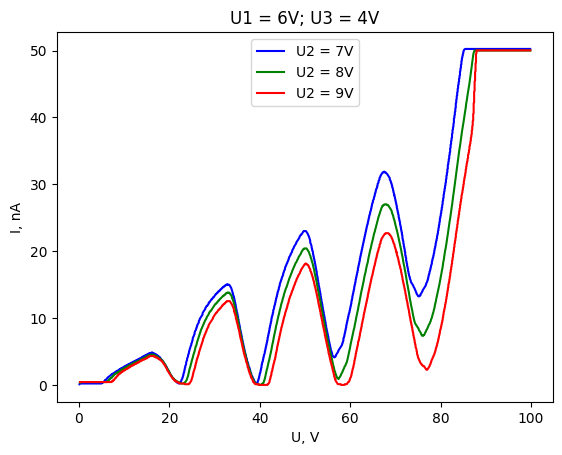

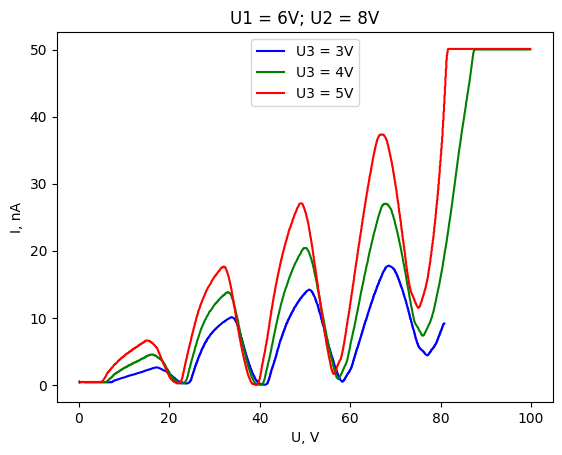

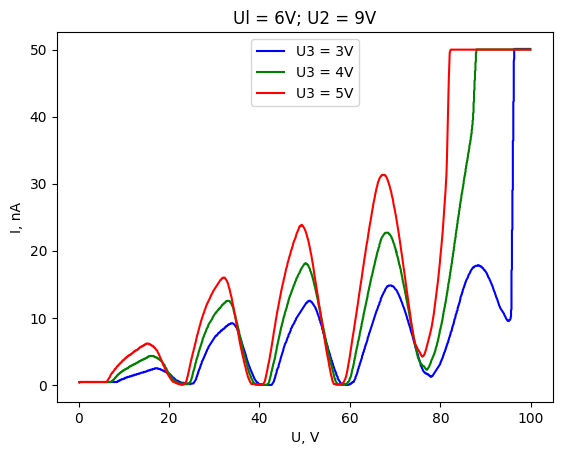

In [5]:
for elem in plotsData:
    drawPlots(
        ds1 = elem['dfs'][0], ds2 = elem['dfs'][1], ds3 = elem['dfs'][2],
        lb1 = elem['lbs'][0], lb2 = elem['lbs'][1], lb3 = elem['lbs'][2],
        title = elem['title']
    )